# Chapter 5 - Point Processing

## 5.1 Introduction

Any image processing operation transforms the grey values of pixels and can be divided into three mains classes:

1. **Transforms -** Requires the knowledge of all grey levels in the entire image to apply the transform.
    
2. **Spatial filters -** Requires only knowledge of a small neighborhood around a pixel to change its value.
    
3. **Point operations -** A pixel value is changed without any knowledge of its surroundings.

## 5.2 Arithmetic operations

The output image is obtained by:

$$g(x,y) = T[f(x,y)]$$

Where $T$ is a linear map:

$$T(p) = a \cdot p + b$$

Usually we round the output and perform *clipping* to obtain discrete values in the interval [0 … 255].

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("../digital-image-processing/img/pollen.jpg", cv2.IMREAD_GRAYSCALE)

In [3]:
def imshow(img, title, vmin=0, vmax=255, cmap="gray"):
    plt.imshow(img, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.title(title)
    plt.axis('off')

def imshow3(img1, img2, img3, title1, title2, title3):
    plt.figure(figsize=(15, 15))
    plt.subplot(131), imshow(img1, title1)
    plt.subplot(132), imshow(img2, title2)
    plt.subplot(133), imshow(img3, title3)
    plt.show()

def imshow4(img1, img2, img3, img4, title1, title2, title3, title4):
    plt.figure(figsize=(10, 10))
    plt.subplot(221), imshow(img1, title1, 0.0, 1.0)
    plt.subplot(222), imshow(img2, title2, 0, 255)
    plt.subplot(223), imshow(img3, title3, 0.0, 1.0)
    plt.subplot(224), imshow(img4, title4, 0.0, 1.0)
    plt.show()

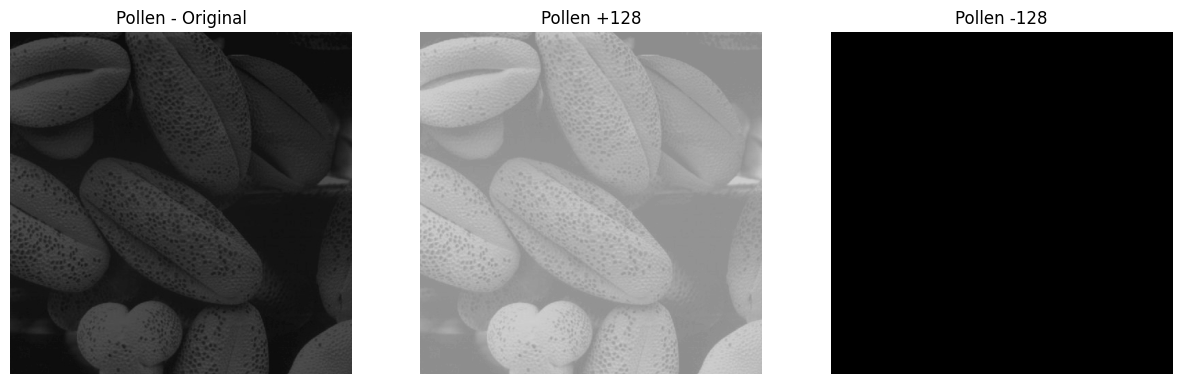

In [10]:
imshow3(img, cv2.add(img, 128), cv2.add(img, -128), "Pollen - Original", "Pollen +128", "Pollen -128")

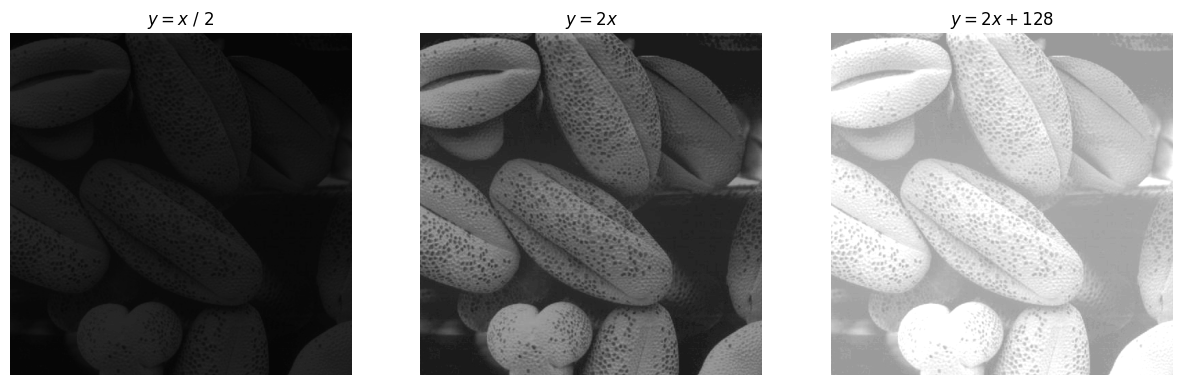

In [7]:
img1 = cv2.multiply(img, 1 / 2)
img2 = cv2.multiply(img, 2)
img3 = cv2.add(cv2.multiply(img, 2), 128)

imshow3(img1, img2, img3, r"$y = x \ / \ 2$", r"$y = 2x$", r"$y = 2x + 128$")

### Complements

The complement ofa greyscale image is its photographic negative. Depending on the type of the image the complement may be calculed in different ways:

* Float (range 0. to 1.) `1. - img`
* Binary (bit 0 or 1) `~img`
* Greyscale (range 0 to 255) `cv2.invert`

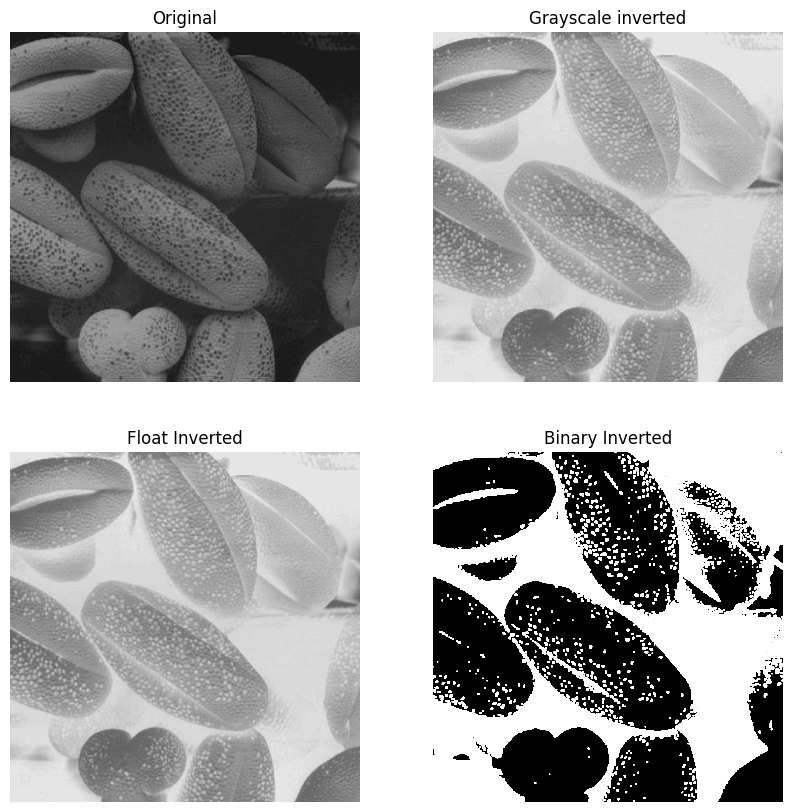

In [8]:


img_float = img2.astype("float32") / 255.
img_bin = cv2.threshold(img2, 64, 255, cv2.THRESH_BINARY)[1] # threshold 127

img_float_ = 1. - img_float
img_bin_ = 255 - img_bin # same as ~img_bin because values only 0 or 255
img2_ = 255 - img2

imshow4(img_float, img2_, img_float_, img_bin_, "Original", "Grayscale inverted", "Float Inverted", "Binary Inverted")

## 5.3 Histograms